# FAANG Stock Data Lab – Infrastructure & Setup

This Jupyter notebook explores hourly stock data for the FAANG companies—**Facebook (Meta), Apple, Amazon, Netflix, and Google (Alphabet)**—using Python. It guides you through:

- 📥 Retrieving data with `yfinance`  
- 🧹 Cleaning and preparing datasets  
- 📊 Visualizing trends  
- 📈 Performing basic statistical analysis  

All code follows **PEP 8** style guidelines for clarity and consistency. Each code cell focuses on a single step and includes comments explaining key lines.

Assignment specifics: this notebook maps directly to the module Problems. Problem 1 handles data download, and Problem 2 plots the latest dataset. Stubs/notes are provided for Problems 3–4 in the README.

Target audience: an informed computing professional (e.g., a prospective employer). We assume strong computing background but not prior familiarity with these particular Python packages; comments and short explanations are provided where helpful.

### Key concepts: Setup

- Use PEP 8 for readable, consistent code ([PEP 8](https://peps.python.org/pep-0008/)).
- Set plotting defaults for reproducible visuals ([Jupyter best practices](https://jupyter.org/practices)).
- Keep imports minimal to reduce environment friction ([Real Python: imports](https://realpython.com/python-imports/)).

## 📚 Background: Accessing Market Data with `yfinance`

[`yfinance`](https://pypi.org/project/yfinance/) is a Python library that provides a simple interface to download historical and real-time financial data from Yahoo Finance. It’s widely used in research, education, and personal finance projects due to its ease of use.

> ⚠️ **Note:** `yfinance` is not affiliated with or endorsed by Yahoo Inc. Use it only for educational or research purposes.

## ⚙️ Install Dependencies (if needed)

If `yfinance` is not already installed in your notebook environment, run the following cell:

```python
# Install yfinance if not already available
%pip install yfinance
```

## 📊 Problem 1 — FAANG Stock Data with `yfinance`

In this task, you'll download **hourly stock data** for the FAANG companies:

- META (Facebook), AAPL (Apple), AMZN (Amazon), NFLX (Netflix), GOOG (Google)

You'll retrieve data for the **past 5 days** using the `yfinance` library and save timestamped CSVs to the `data/` folder.

> 🧼 Keep code cells small, well-commented, and reproducible.

# ⚙️ Setup – Imports and Plotting Defaults

This step performs minimal setup:
- Imports required libraries
- Sets plotting defaults
- Defines a toggle (`SHOW_PREVIEW`) to control DataFrame previews

Tip: For reproducible environments, prefer a virtual environment and install from `requirements.txt` rather than installing within the notebook.

In [1]:
# 🛠️ Minimal Setup: Imports, plotting defaults, and preview flag
# - Keeps imports lightweight for faster startup and easier reproducibility
# - SHOW_PREVIEW toggles DataFrame previews (useful to suppress output in CI or grading scripts)

# 📁 os: Interface with the operating system (e.g., file paths, environment variables)
# Reference: https://docs.python.org/3/library/os.html
import os

# 🕒 datetime, timezone: Handle timestamps and timezone-aware operations
# Reference: https://docs.python.org/3/library/datetime.html
from datetime import datetime, timezone

# 🔍 Toggle previews of large tables (set False for CI or automated grading)
SHOW_PREVIEW: bool = True

# 📊 Core libraries used in the notebook
import pandas as pd  # Tabular data analysis and manipulation
# Reference: https://pandas.pydata.org/docs/

import numpy as np   # Numerical computing (arrays, math helpers)
# Reference: https://numpy.org/doc/

import yfinance as yf  # Financial data from Yahoo Finance
# Reference: https://github.com/ranaroussi/yfinance

import matplotlib.pyplot as plt  # Plotting library for visualizations
# Reference: https://matplotlib.org/stable/contents.html

import seaborn as sns  # Statistical plot styling built on top of matplotlib
# Reference: https://seaborn.pydata.org/

from collections import Counter  # Frequency counting for diagnostics and validation
# Reference: https://docs.python.org/3/library/collections.html#collections.Counter

# 🎨 Plotting defaults for consistent visuals across environments
plt.rcParams['figure.figsize'] = (10, 5)  # Set default figure size
sns.set_style('whitegrid')  # Apply clean grid style to all plots

print("✅ Minimal setup complete. If you need to install packages, see README_SETUP.md.")


✅ Minimal setup complete. If you need to install packages, see README_SETUP.md.


### Key concepts: Setup (continued)

- Use `%pip install` in notebooks only if needed; prefer project venv + requirements.txt ([Jupyter best practices](https://jupyter.org/practices)).
- Keep notebook installs minimal to maintain reproducibility ([The Turing Way](https://the-turing-way.netlify.app/reproducible-research/overview/overview.html)).

## 🔍 Quick Verification – Package Availability

This section verifies pandas/yfinance are importable and performs a lightweight yfinance request to confirm network/API access. If anything is missing, see README_SETUP.md or install from requirements.txt.

In [2]:
# 🧪 Quick verification of essential packages and yfinance functionality
# - Confirms pandas and yfinance are importable
# - Executes a lightweight history() call to validate network access and API response
# - Helps diagnose setup issues early in the notebook

ok = True  # Flag to track environment readiness

# 🐼 Check pandas availability
# Reference: pandas is essential for DataFrame operations
# https://pandas.pydata.org/docs/
if 'pd' not in globals() or pd is None:
    print("❌ pandas not available. Install with: python -m pip install pandas")
    ok = False

# 📈 Check yfinance availability
# Reference: yfinance provides historical market data via Yahoo Finance
# https://github.com/ranaroussi/yfinance
if 'yf' not in globals() or yf is None:
    print("❌ yfinance not available. Install with: python -m pip install yfinance")
    ok = False

# ✅ If both packages are present, perform a lightweight yfinance request
if ok:
    try:
        # 🏦 Create a Ticker object for Apple Inc.
        t = yf.Ticker("AAPL")

        # ⏱️ Fetch 1 day of hourly historical data
        # Reference: .history() method with period and interval
        # https://github.com/ranaroussi/yfinance#ticker-module
        df = t.history(period="1d", interval="1h")

        # 📊 Confirm successful fetch and show shape
        print("✅ yfinance request succeeded — rows, cols =", df.shape)

        # 👀 Optional preview of first few rows
        # Reference: pandas.DataFrame.head()
        # https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html
        if SHOW_PREVIEW:
            display(df.head())

    except Exception as e:
        # ❌ Report failure with error message
        print("❌ yfinance request failed:", e)
else:
    # ⚠️ Environment not ready — prompt user to install missing packages
    print("⚠️ Environment not ready — install missing packages and re-run this cell.")


✅ yfinance request succeeded — rows, cols = (6, 7)


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,
2025-10-21 09:30:00-04:00,261.880005,265.290009,261.880005,263.499908,17003580,0.0,0.0
2025-10-21 10:30:00-04:00,263.459991,263.829987,262.510010,263.661987,4721265,0.0,0.0
2025-10-21 11:30:00-04:00,263.670013,264.535004,263.080109,263.170013,5514253,0.0,0.0
2025-10-21 12:30:00-04:00,263.160004,263.679901,262.847504,263.326508,2671606,0.0,0.0
2025-10-21 13:30:00-04:00,263.325806,264.049988,262.149994,263.449890,3718095,0.0,0.0


### Key concepts: Setup (verification)

- Verify required packages up front to avoid mid-notebook failures ([Jupyter best practices](https://jupyter.org/practices)).
- Prefer lightweight network checks for external APIs ([Real Python: package management](https://realpython.com/python-package-management/)).

## Install packages from repository requirements.txt (if needed)

In [3]:
# 📦 Install packages from repository requirements.txt (if needed)
# - Optional: for environments launched outside the project venv
# - Prefer using the virtual environment setup in README_SETUP.md
# - Use this cell only if packages are missing or setup is incomplete

# 🔧 sys: Access Python runtime environment (e.g., current interpreter path)
import sys

# 🛠️ subprocess: Run shell commands from Python (used to call pip)
# Reference: https://docs.python.org/3/library/subprocess.html
import subprocess

# 📁 pathlib: Modern, object-oriented file path handling
# Reference: https://docs.python.org/3/library/pathlib.html
import pathlib

# 🔍 importlib: Inspect and dynamically import modules
# Reference: https://docs.python.org/3/library/importlib.html
import importlib

# 📁 Path to requirements.txt (assumes it's one level up from the notebook)
req = pathlib.Path('..') / 'requirements.txt'

if req.exists():
    try:
        # 🧪 Install packages quietly using pip
        subprocess.check_call([
            sys.executable, '-m', 'pip', 'install', '--quiet', '-r', str(req)
        ])
        print(f"✅ Installed packages from {req}")
    except subprocess.CalledProcessError as e:
        # ❌ Report pip failure with exit code
        print(f"❌ pip install failed with code {e.returncode}")
else:
    # ⚠️ Warn if requirements.txt is missing
    print(f"⚠️ requirements.txt not found at: {req}")

# 🔍 Quick availability check (non-fatal)
# - Verifies presence of key packages used in the notebook
# - Uses importlib.util.find_spec() to check importability
print("\n📦 Package availability check:")
for pkg in ('yfinance', 'pandas', 'numpy', 'requests', 'matplotlib', 'seaborn'):
    spec = importlib.util.find_spec(pkg)
    status = "✅ available" if spec else "❌ NOT available"
    print(f"{pkg}: {status}")


✅ Installed packages from ..\requirements.txt

📦 Package availability check:
yfinance: ✅ available
pandas: ✅ available
numpy: ✅ available
requests: ✅ available
matplotlib: ✅ available
seaborn: ✅ available


## FAANG Tickers and Data Download Overview

## Canonical Ticker List

### Key concepts: Fetch (ticker list)

- Centralize ticker list and deduplicate defensively ([Real Python: constants](https://realpython.com/python-constants/)).
- Validate DataFrames before downstream steps ([pandas docs](https://pandas.pydata.org/docs/)).

In [4]:
# ✅ Canonical list of FAANG tickers used throughout the notebook
# - Using a list preserves order and readability
# - Defensive deduplication ensures no accidental repeats
# - Includes a sanity check to validate expected length

# 🧾 Initial FAANG tickers list (Meta, Apple, Amazon, Netflix, Google)
tickers = ['META', 'AAPL', 'AMZN', 'NFLX', 'GOOG']

# 🧹 Remove accidental duplicates while preserving order
# Reference: dict.fromkeys(...) preserves insertion order since Python 3.7+
# https://docs.python.org/3/library/stdtypes.html#dict
tickers = list(dict.fromkeys(tickers))

# 🔍 Sanity check: Confirm expected number of tickers
# Helps catch silent duplication or formatting issues
if len(tickers) != 5:
    print('⚠️ Warning: unexpected tickers list (duplicates removed):', tickers)


# Fetch Function

## Download and label data

This section fetches hourly history for each ticker, labels each DataFrame, and saves CSVs to `data/`. Code is split into a small reusable function and a runner cell.

### Key concepts: Fetch (function)

- Encapsulate data fetching in a reusable function with clear return values ([pandas docs](https://pandas.pydata.org/docs/)).
- Use `df.copy()` to avoid SettingWithCopyWarning ([pandas DataFrame.copy](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.copy.html)).
- Return `None` on failure for defensive programming ([Python for Data Analysis](https://www.oreilly.com/library/view/python-for-data/9781491957653/)).

In [5]:
# 📥 Function: Fetch hourly stock data for a single ticker
# - Wraps yfinance's .history() call with minimal cleanup
# - Adds 'Ticker' column for traceability
# - Returns a labeled pandas DataFrame or None on failure
# - Designed for modular reuse in data collection workflows

from typing import Optional

def fetch_hourly_history(ticker: str, period: str = '5d', interval: str = '1h') -> Optional[pd.DataFrame]:
    """
    Fetch hourly historical stock data for a single ticker using yfinance.

    Parameters
    ----------
    ticker : str
        Stock symbol (e.g., 'AAPL').
    period : str
        Range of time to download (e.g., '5d' for 5 days).
        Reference: https://github.com/ranaroussi/yfinance#period
    interval : str
        Data granularity (e.g., '1h' for hourly).
        Reference: https://github.com/ranaroussi/yfinance#interval

    Returns
    -------
    Optional[pd.DataFrame]
        Labeled DataFrame with index named 'Date', or None if fetch fails.
        Reference: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html
    """
    try:
        # 🏦 Construct a Ticker object for the symbol
        # Reference: https://github.com/ranaroussi/yfinance#ticker-module
        t = yf.Ticker(ticker)

        # 📊 Retrieve historical data with specified period and interval
        df = t.history(period=period, interval=interval)

        # 🚫 Skip if no data is returned or DataFrame is empty
        if df is None or df.empty:
            return None

        # 🧼 Defensive copy to avoid SettingWithCopyWarning
        df = df.copy()

        # 🏷️ Add 'Ticker' column for traceability in merged datasets
        df['Ticker'] = ticker

        # 🗓️ Name the index for clarity in CSV exports
        df.index.name = 'Date'

        return df

    except Exception as e:
        # ❌ Gracefully handle errors (e.g., network issues, invalid ticker)
        print(f"❌ Error fetching {ticker}: {e}")
        return None

# 🔍 Smoke test: Try fetching AAPL data (non-blocking)
# - Prints row count if successful
_test = fetch_hourly_history('AAPL')
if _test is not None:
    print('✅ Fetched AAPL rows:', _test.shape[0])


✅ Fetched AAPL rows: 34


### Key concepts: Save

- Use UTC timestamps in filenames for sorting and reproducibility ([Jupyter best practices](https://jupyter.org/practices)).
- Wrap file I/O in try/except for robust workflows ([Real Python: file I/O](https://realpython.com/python-file-io/)).

## Runner – Save CSVs

In [6]:
# 📈 Runner: Fetch hourly data for each ticker and save to timestamped CSV files
# - Ensures output folder exists inside ../data (notebooks-relative path)
# - Skips duplicate tickers and avoids redundant saves
# - Uses UTC timestamps in ISO 8601 format (YYYYMMDDTHHMMSSZ) for sorting
# - Gracefully handles missing or empty dataframes
# - Returns a mapping of ticker symbols to saved file paths

# ✅ Defensive deduplication: remove duplicate tickers while preserving order
# Reference: dict.fromkeys() preserves insertion order since Python 3.7+
# https://docs.python.org/3/library/stdtypes.html#dict
tickers = list(dict.fromkeys(tickers))

# 📁 Ensure output folder exists (relative to notebook location)
# Reference: os.makedirs() with exist_ok=True avoids errors if folder already exists
# https://docs.python.org/3/library/os.html#os.makedirs
os.makedirs('../data', exist_ok=True)

# 🗂️ Initialize tracking structures
results: dict[str, str] = {}  # Maps ticker to saved file path
errors: list[str] = []        # Collect non-fatal save errors
seen: set[str] = set()        # Tracks tickers already processed

for ticker in tickers:
    # 🚫 Skip duplicate tickers already seen in this session
    if ticker in seen:
        continue
    seen.add(ticker)

    # ⏱️ Fetch hourly historical data for the ticker
    # Assumes fetch_hourly_history() returns a pandas.DataFrame or None
    # Reference: pandas.DataFrame.empty checks for non-empty data
    # https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.empty.html
    df = fetch_hourly_history(ticker)
    if df is None or df.empty:
        continue

    # 🔁 Avoid saving if a file for this ticker already exists in ../data
    # Choose the latest by filename (timestamps are sortable)
    existing = [p for p in os.listdir('../data') if p.startswith(f"{ticker}_") and p.endswith('.csv')]
    if existing:
        latest = sorted(existing, reverse=True)[0]
        results[ticker] = os.path.join('../data', latest)
        continue

    # 🕒 Generate UTC timestamp for filename (sortable and unique)
    # Reference: datetime.strftime() with timezone-aware UTC formatting
    # https://docs.python.org/3/library/datetime.html#strftime-and-strptime-format-codes
    ts = datetime.now(timezone.utc).strftime('%Y%m%dT%H%M%SZ')
    filename = os.path.join('../data', f'{ticker}_{ts}.csv')

    try:
        # 💾 Save DataFrame to CSV with index included
        # Reference: pandas.DataFrame.to_csv()
        # https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html
        df.to_csv(filename, index=True)
        results[ticker] = filename
    except Exception as exc:
        # ⚠️ Record failed saves for visibility
        errors.append(f"{ticker}: {exc}")

# 📌 Final output: dictionary mapping ticker symbols to saved file paths
# Useful for downstream processing or logging
if errors:
    print("⚠️ Some saves failed:")
    for e in errors:
        print(" -", e)
results

{'META': '../data\\META_20251021T182243Z.csv',
 'AAPL': '../data\\AAPL_20251021T182243Z.csv',
 'AMZN': '../data\\AMZN_20251021T182243Z.csv',
 'NFLX': '../data\\NFLX_20251021T182243Z.csv',
 'GOOG': '../data\\GOOG_20251021T182243Z.csv'}

### Key concepts: Save (runner)

- Check for existing files before saving to avoid duplication ([Real Python: file I/O](https://realpython.com/python-file-io/)).
- Use try/except for robust file operations ([Python Cookbook](https://www.oreilly.com/library/view/python-cookbook-3rd/9781449340377/ch17s12.html)).

## 🔍 Fetch and Preview Hourly Data for Each Ticker

This section builds a dictionary of hourly stock data for each FAANG ticker using the `fetch_hourly_history()` function.

- Each ticker is fetched individually.
- Valid DataFrames are stored in a dictionary keyed by ticker symbol.
- Optionally, a preview of each DataFrame is displayed.

> 📦 This modular approach supports downstream analysis and avoids failures due to missing data.


In [7]:
# 📦 Build a dictionary by reading the latest saved CSV for each ticker
# - Avoids a second network fetch (uses files saved by the runner)
# - Parses the 'Date' column as DateTimeIndex for time-series operations
# - Skips tickers without any saved files
# - Supports reproducibility and offline analysis

data = {}  # Dictionary to hold ticker -> DataFrame mappings

for ticker in tickers:
    # 📁 Find all CSVs saved for this ticker in ../data
    # Reference: os.listdir() lists files in a directory
    # https://docs.python.org/3/library/os.html#os.listdir
    files = [p for p in os.listdir('../data') if p.startswith(f"{ticker}_") and p.endswith('.csv')]
    if not files:
        print(f"⚠️ No saved CSV found for {ticker} in ../data")
        continue

    # 🕒 Pick the latest file by filename (timestamps are sortable)
    latest = sorted(files, reverse=True)[0]
    path = os.path.join('../data', latest)

    # 📖 Read CSV with parsed dates and DateTimeIndex
    # Reference: pandas.read_csv() with parse_dates and index_col
    # https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html
    df = pd.read_csv(path, parse_dates=['Date'], index_col='Date')

    # ✅ Store valid DataFrame in dictionary
    data[ticker] = df

# 👀 Preview: Display shape and head of each DataFrame
# - df.shape shows (rows, columns)
# - df.head() shows first 5 rows by default
# Reference: pandas.DataFrame.head()
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html
for sym, df in data.items():
    print(f"{sym}: {df.shape}")
    if SHOW_PREVIEW:
        display(df.head())


META: (33, 8)


,Open,High,Low,Close,Volume,Dividends,Stock Splits,Ticker
Date,,,,,,,,
2025-10-15 09:30:00-04:00,716.859985,723.049988,713.250000,721.174988,2619944,0.0,0.0,META
2025-10-15 10:30:00-04:00,721.239990,723.900024,717.599976,719.270020,1545413,0.0,0.0,META
2025-10-15 11:30:00-04:00,719.299988,719.940002,713.575012,717.619995,960983,0.0,0.0,META
2025-10-15 12:30:00-04:00,717.429993,718.359985,709.510010,712.349976,754696,0.0,0.0,META
2025-10-15 13:30:00-04:00,712.554993,717.140015,712.119995,716.369995,553669,0.0,0.0,META


AAPL: (33, 8)


,Open,High,Low,Close,Volume,Dividends,Stock Splits,Ticker
Date,,,,,,,,
2025-10-15 09:30:00-04:00,249.380005,251.820007,248.639999,250.850006,8163531,0.0,0.0,AAPL
2025-10-15 10:30:00-04:00,250.869995,251.469193,249.800003,249.859894,3430819,0.0,0.0,AAPL
2025-10-15 11:30:00-04:00,249.820007,250.049698,248.720001,249.774994,2879510,0.0,0.0,AAPL
2025-10-15 12:30:00-04:00,249.779999,249.949905,247.479996,248.090500,2290291,0.0,0.0,AAPL
2025-10-15 13:30:00-04:00,248.104996,249.800003,248.050003,249.647003,1934212,0.0,0.0,AAPL


AMZN: (33, 8)


,Open,High,Low,Close,Volume,Dividends,Stock Splits,Ticker
Date,,,,,,,,
2025-10-15 09:30:00-04:00,216.699997,217.710007,215.910095,216.199997,10791942,0.0,0.0,AMZN
2025-10-15 10:30:00-04:00,216.220001,216.740005,215.149994,215.440002,7726538,0.0,0.0,AMZN
2025-10-15 11:30:00-04:00,215.449997,215.699997,214.149994,215.420105,5487150,0.0,0.0,AMZN
2025-10-15 12:30:00-04:00,215.460007,215.539993,212.660004,213.615005,5527751,0.0,0.0,AMZN
2025-10-15 13:30:00-04:00,213.634995,215.000000,213.470001,214.800003,3033134,0.0,0.0,AMZN


NFLX: (33, 8)


,Open,High,Low,Close,Volume,Dividends,Stock Splits,Ticker
Date,,,,,,,,
2025-10-15 09:30:00-04:00,1213.010010,1218.000000,1206.000000,1214.150024,417645,0.0,0.0,NFLX
2025-10-15 10:30:00-04:00,1214.875000,1219.619995,1212.290039,1216.810059,235499,0.0,0.0,NFLX
2025-10-15 11:30:00-04:00,1216.849976,1219.104980,1212.000000,1212.000000,217204,0.0,0.0,NFLX
2025-10-15 12:30:00-04:00,1211.859985,1213.209961,1203.373047,1205.421265,190657,0.0,0.0,NFLX
2025-10-15 13:30:00-04:00,1206.114990,1210.329956,1203.209961,1203.964966,146139,0.0,0.0,NFLX


GOOG: (33, 8)


,Open,High,Low,Close,Volume,Dividends,Stock Splits,Ticker
Date,,,,,,,,
2025-10-15 09:30:00-04:00,247.910004,252.600006,246.789993,251.970001,3814027,0.0,0.0,GOOG
2025-10-15 10:30:00-04:00,251.970001,252.759995,250.410995,251.009995,1835298,0.0,0.0,GOOG
2025-10-15 11:30:00-04:00,250.939896,251.139999,249.229996,249.990005,1219453,0.0,0.0,GOOG
2025-10-15 12:30:00-04:00,249.940002,250.264999,247.440002,248.235001,994289,0.0,0.0,GOOG
2025-10-15 13:30:00-04:00,248.190506,250.709595,248.190506,250.470001,802770,0.0,0.0,GOOG


### Key concepts: Plot

- Plot all tickers on one chart for comparison ([matplotlib docs](https://matplotlib.org/stable/users/index.html)).
- Label axes, add legend, and use a date-range title for clarity.
- Save plot with stable filename for consistent GitHub/README embedding.

✅ Plot saved to ../plots\faang_close_20251021T183203Z.png


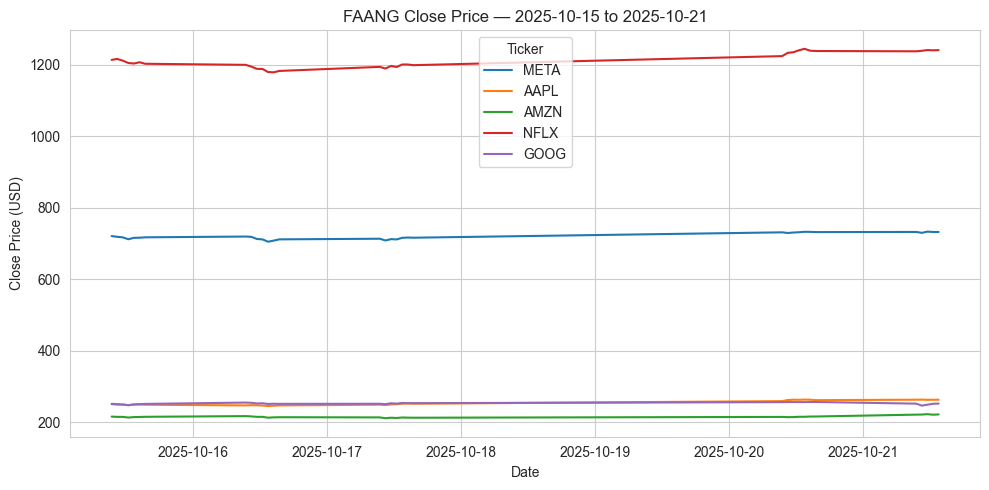

In [8]:
# 📈 Plot Close Prices for All Tickers
# - Uses the `data` dictionary populated from saved CSVs
# - Plots the 'Close' series for each ticker on a shared timeline
# - Saves a timestamped PNG to ../plots for reproducibility and grading

# 🧪 Ensure we have valid data to plot
# Reference: globals().get() safely checks for existence of `data`
# https://docs.python.org/3/library/functions.html#globals
if not isinstance(globals().get('data'), dict) or not data:
    raise RuntimeError("No data to plot. Run the CSV preview cell to build the `data` dict.")

# 📁 Ensure plots directory exists (relative to notebook)
# Reference: os.makedirs() with exist_ok=True avoids errors if folder already exists
# https://docs.python.org/3/library/os.html#os.makedirs
os.makedirs('../plots', exist_ok=True)

# 📅 Compute overall date range for plot title
# - Filters out empty DataFrames and ensures datetime index
# Reference: pandas.DatetimeIndex
# https://pandas.pydata.org/docs/reference/api/pandas.DatetimeIndex.html
all_indices = [df.index for df in data.values() if isinstance(df.index, pd.DatetimeIndex) and not df.empty]
if not all_indices:
    raise RuntimeError("DataFrames missing or have no datetime index.")

min_date = min(idx.min() for idx in all_indices)
max_date = max(idx.max() for idx in all_indices)

# 🎨 Plot Close prices for each ticker
# Reference: matplotlib.pyplot.plot()
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html
plt.figure()
for sym, df in data.items():
    if 'Close' in df.columns and not df.empty:
        plt.plot(df.index, df['Close'], label=sym)

# 🏷️ Axis labels and title
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.title(f"FAANG Close Price — {min_date.date()} to {max_date.date()}")
plt.legend(title='Ticker')
plt.tight_layout()

# 💾 Save figure with UTC timestamp for reproducibility
# Reference: datetime.strftime() for ISO 8601 format
# https://docs.python.org/3/library/datetime.html#strftime-and-strptime-format-codes
ts = datetime.now(timezone.utc).strftime('%Y%m%dT%H%M%SZ')
plot_path = os.path.join('../plots', f'faang_close_{ts}.png')
plt.savefig(plot_path)

print(f"✅ Plot saved to {plot_path}")

## Diagnostic – Ticker Validation

In [9]:
# 🧪 Diagnostic: Show effective tickers and detect duplicates
# - Displays the current list of tickers
# - Uses collections.Counter to count occurrences
# - Flags any tickers that appear more than once
# - Helps validate input before data fetching

# 📋 Display the current list of tickers
print("📋 Effective tickers:", tickers)

# 🔢 Count occurrences of each ticker symbol
# Reference: collections.Counter — a dict subclass for counting hashable items
# https://docs.python.org/3/library/collections.html#collections.Counter
counts = Counter(tickers)

# 🚨 Identify tickers with more than one occurrence
dups = [t for t, c in counts.items() if c > 1]

# 📣 Report findings to user
if dups:
    print(f"⚠️ Duplicate tickers found: {dups}")
else:
    print("✅ No duplicate tickers detected.")



📋 Effective tickers: ['META', 'AAPL', 'AMZN', 'NFLX', 'GOOG']
✅ No duplicate tickers detected.


### Key concepts: Diagnostics

- Use `collections.Counter` for quick frequency checks ([Python Cookbook](https://www.oreilly.com/library/view/python-cookbook/0596001673/ch01s02.html)).
- Provide clear feedback to help users debug inputs ([Real Python: notebooks](https://realpython.com/python-notebooks/)).

# END